In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import random

In [2]:
#LR loss function
def loss(h, y) : 
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum()

In [3]:
#predicting class function
def predict(weights, bias, X):
    w = np.dot(X, weights) + bias
    y_pred = 1/(1+np.exp(-w))
    binary_pred = [1 if i>0.5 else 0 for i in y_pred]
    return binary_pred

In [4]:
#calculating true/false positives/negatives:
def evaluate(y_pred, y):
    k=0
    tp=0
    fp=0
    fn=0
    tn=0
    for x in y_pred:
        if x==1:
            if y[k] == 1:
                tp+=1
            else:
                fp+=1
        else:
            if y[k] == 1:
                fn+=1
            else:
                tn+=1
        k+=1
    return tp,fp,tn,fn

In [5]:
#LR using gradient decent 
def LogisticRegression(lr, iterations, X, y):
    rows, features = X.shape
    weights = np.zeros(features)
    bias = 0
    y = y.reshape((y.shape[0],))
    
    l = []
    a = []

    #Gradient descent
    for i in range(iterations):
        w = np.dot(X, weights) + bias
        y_pred = 1/(1+np.exp(-w))
        
        #calculating weight and bias errors
        delta_w = np.dot(X.T, y_pred - y)
        delta_b = np.sum(y_pred - y)
        
        #updating weights and bias 
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
        
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]

        if i % 50 == 0:
            l.append(loss(y_pred , y))
            a.append(((binary_pred == y).sum()/len(y)))
      
    return weights, bias, l, a
    

In [6]:
#LR using stochastic gradient decent 
def LogisticRegressionSGD(lr, iterations, X, y) :
    l=[]
    a=[]
    rows , features  = X.shape
    weights = np.zeros(features)
    bias = 0
    y = y.reshape((y.shape[0],))
    iter_no = 0
    
    #Stochastic Gradient descent
    for i in range(iterations):
         
        #chosing a random entry
        random_number = random.randint(0, len(y)-1)   
        x_b, y_b = X[random_number], y[random_number]

        w = np.dot(x_b, weights) + bias
        
        y_pred = 1/(1+np.exp(-w))
        
        #calculating weight and bias errors
        delta_w = np.dot(x_b.T , y_pred - y_b)
        delta_b = np.sum(y_pred - y_b)
        
        #updating weights and bias 
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
            
        binary_pred = predict(weights,bias,X)
            
        iter_no+=1
            
        if iter_no%50==0:
            l.append(loss(y_pred , y_b))
            tp,fp,tn,fn = evaluate(binary_pred , y)
            a.append((tp+tn)/(tp+tn+fp+fn))
                
    return weights,bias,l,a      


In [7]:
#reading data
df = pd.read_csv('dataset_LR.csv')
df.head()

,attr1,attr2,attr3,attr4,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
#creating lists to append them for calculation of averages
Accuracy =[]
Accuracy_t =[]
AccuracySGD=[]
AccuracySGD_t=[]

Loss=[]
LossSGD =[]

Fscore = []
Fscore_t = []
FscoreSGD=[]
FscoreSGD_t=[]

Precision=[]
Precision_t=[]
PrecisionSGD =[]
PrecisionSGD_t =[]

Recall=[]
Recall_t=[]
RecallSGD=[]
RecallSGD_t=[]

wGD=[]
bGD=[]
wSGD=[]
bSGD=[]

for j in range(10):     
    lrate= 0.001
    no_iter=10000
    
    #read and create 70:30 train-test splits
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()

    #calling function return values
    weights,bias,los, acc = LogisticRegression(lrate , no_iter , np_X , np_y)
    wGD.append(weights)
    bGD.append(bias)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate , no_iter, np_X , np_y)
    wSGD.append(weightsSGD)
    bSGD.append(biasSGD)

    print(" ")
    print("=============================================Shuffle number :",j,"==============================")
    print("*********************************************Gradient Descent************************************")
    
    print("GD weights:",weights)
    print("GD bias:",bias)
    print("Loss :",los[-1])
    
    print("---------------------------------------------Training dataset-----------------------------------")
    
    predicted = predict(weights , bias , np_X)
    tp,fp,tn,fn = evaluate(predicted , np_y)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    
    #appending evaluation metrics list
    Accuracy.append(accuracy)
    Loss.append(los[-1])
    Fscore.append(f1)
    Precision.append(precision)
    Recall.append(recall)
    

    print("-----------------------------------------Testing dataset----------------------------------------")
    
    X_test = df_test.iloc[: , 0:4]
    y_test = df_test.iloc[: , -1:]

    np_X_t = X_test.to_numpy()
    np_y_t = y_test.to_numpy()
    np_y_t = np_y_t.reshape((np_y_t.shape[0],))
        
    predicted = predict(weights , bias , np_X_t)
    tp,fp,tn,fn = evaluate(predicted , np_y_t)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    
    #appending evaluation metrics list
    Accuracy_t.append(accuracy)
    Fscore_t.append(f1)
    Precision_t.append(precision)
    Recall_t.append(recall)
    
    print("***************************************Stochastic Gradient Descent************************************")
    
    print("SGD Weights : ",weightsSGD)
    print("SGD Bias : ",biasSGD)
    print("Loss :",lSGD[-1])

    
    print("---------------------------------------------Training dataset-----------------------------------")
    
    predicted = predict(weightsSGD , biasSGD , np_X)
    tp,fp,tn,fn = evaluate(predicted , np_y)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
        
    #appending evaluation metrics list
    AccuracySGD.append(accuracy)
    LossSGD.append(lSGD[-1])
    FscoreSGD.append(f1)
    PrecisionSGD.append(precision)
    RecallSGD.append(recall)
    
    print("-----------------------------------------Testing dataset----------------------------------------")
    predicted = predict(weightsSGD , biasSGD , np_X_t)
    tp,fp,tn,fn = evaluate(predicted , np_y_t)
    
    #calculating evaluation metrics
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    
    #appending evaluation metrics lists
    AccuracySGD_t.append(accuracy)
    FscoreSGD_t.append(f1)
    PrecisionSGD_t.append(precision)
    RecallSGD_t.append(recall)
    

 
=============================================Shuffle number : 0 ==============================
*********************************************Gradient Descent************************************
GD weights: [-6.72751986 -3.74218161 -4.66157623 -0.58891591]
GD bias: 6.594362254923146
Loss : 15.211658723607076
---------------------------------------------Training dataset-----------------------------------
Recall : 0.9929742388758782
Precision : 0.9883449883449883
F1 score : 0.9906542056074765
Accuracy :  0.9916666666666667
-----------------------------------------Testing dataset----------------------------------------
Recall : 0.9890710382513661
Precision : 0.9731182795698925
F1 score : 0.981029810298103
Accuracy :  0.9830097087378641
 
***************************************Stochastic Gradient Descent************************************
SGD Weights :  [-1.16364974 -0.64030732 -0.66410364 -0.26532481]
SGD Bias :  0.5431023645241033
Loss : 0.013359005291530368
----------------------------

In [9]:
#calculating mean weights,bias GD
final_wGD=[0,0,0,0]

for i in range(10):
    final_wGD=final_wGD+wGD[i]
    
final_wGD=final_wGD/10
final_bGD=mean(bGD)

In [10]:
#calculating mean weights,bias SGD

final_wSGD=[0,0,0,0]

for i in range(10):
    final_wSGD=final_wSGD+wSGD[i]
    
final_wSGD=final_wSGD/10
final_bSGD=mean(bSGD)


In [11]:
print("======================================Average values :======================================")

print(" ")
print("......................................Gradient Decent...................................... ")
print(" ")

print("GD weights: ",final_wGD)
print("GD bias: ",final_bGD)
print("Loss :",mean(Loss))
print(" ")

print("_________________Training GD___________________")
print("Accuracy :" ,mean(Accuracy))
print("Precision :",mean(Precision))
print("Recall :",mean(Recall))
print("F score :",mean(Fscore))

print(" ")
print("_________________Testing GD___________________")
print("Accuracy :" ,mean(Accuracy_t))
print("Precision :",mean(Precision_t))
print("Recall :",mean(Recall_t))
print("F score :",mean(Fscore_t))

print(" ")
print("................................Stochastic Gradient Decent................................ ")
print(" ")

print("SGD weights: ",final_wSGD)
print("SGD bias: ",final_bSGD)
print("Loss :",mean(LossSGD))
print(" ")

print("_________________Training SGD___________________")
print("Accuracy :" ,mean(AccuracySGD))
print("Precision :",mean(PrecisionSGD))
print("Recall :",mean(RecallSGD))
print("F score :",mean(FscoreSGD))

print(" ")
print("_________________Testing SGD___________________")
print("Accuracy :" ,mean(AccuracySGD_t))
print("Precision :",mean(PrecisionSGD_t))
print("Recall :",mean(RecallSGD_t))
print("F score :",mean(FscoreSGD_t))

======================================Average values :======================================
 
......................................Gradient Decent...................................... 
 
GD weights:  [-6.7249879  -3.64737894 -4.56634828 -0.51585844]
GD bias:  6.468188514186393
Loss : 17.256750773475122
 
_________________Training GD___________________
Accuracy : 0.9898958333333333
Precision : 0.9880914167728165
Recall : 0.9892053266306223
F score : 0.9886455413080338
 
_________________Testing GD___________________
Accuracy : 0.9883495145631068
Precision : 0.9826349061317602
Recall : 0.9915465440190974
F score : 0.9870427485326556
 
................................Stochastic Gradient Decent................................ 
 
SGD weights:  [-1.17727941 -0.6281906  -0.65638847 -0.27117094]
SGD bias:  0.5423302609272282
Loss : 0.13614029369025965
 
_________________Training SGD___________________
Accuracy : 0.9735416666666666
Precision : 0.9823966599347597
Recall : 0.9574164267517385
F

-----------------Learning Rate : 0.001 ---------------------
 
Final GD weights:  [-7.26208976 -3.79169296 -4.88615905 -0.39404191]
Final GD bias:  7.056304478506723
GD accuracy:  0.9916666666666667


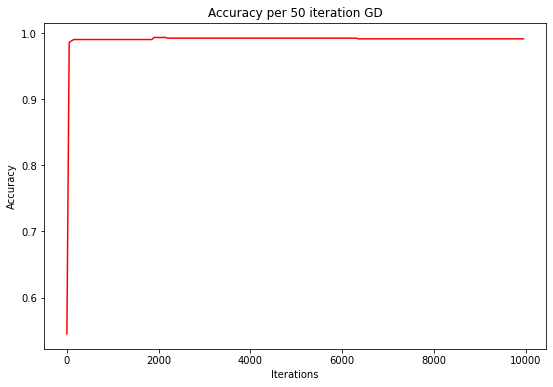

Final SGD weights:  [-1.17629494 -0.62862271 -0.65703837 -0.29616604]
Final SGD bias:  0.5586758573271704
SGD accuracy:  0.9697916666666667


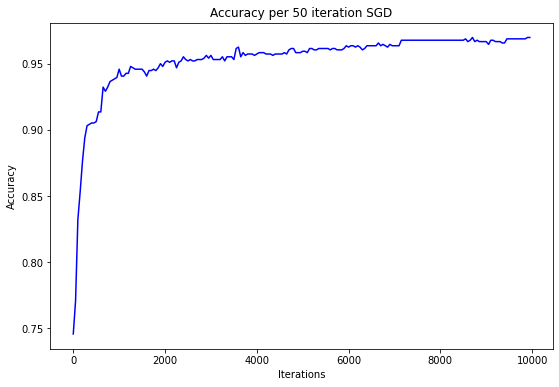

-----------------Learning Rate : 0.0001 ---------------------
 
Final GD weights:  [-3.79909999 -2.24454147 -2.72458359 -0.32108949]
Final GD bias:  4.117354601412575
GD accuracy:  0.9927083333333333


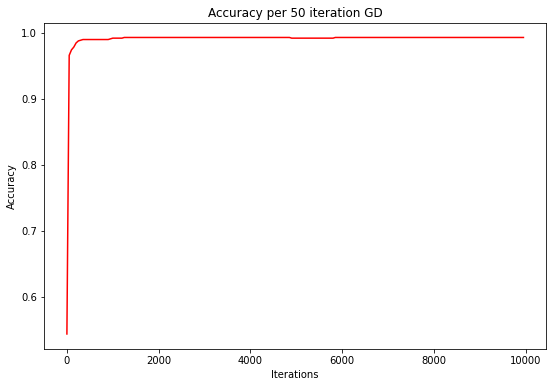

Final SGD weights:  [-0.48124257 -0.23988023 -0.19328113 -0.09964678]
Final SGD bias:  0.044006185069975494
SGD accuracy:  0.9375


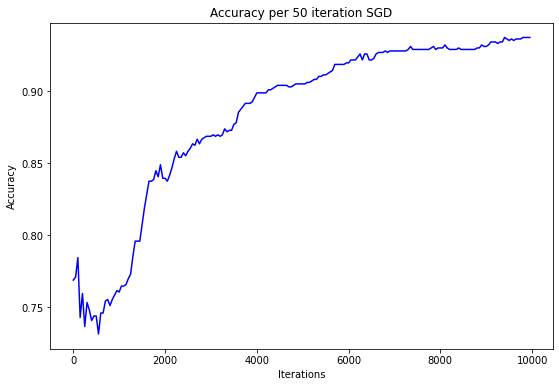

-----------------Learning Rate : 1e-05 ---------------------
 
Final GD weights:  [-2.18013742 -1.26228091 -1.49248549 -0.20549584]
Final GD bias:  2.0485169034008672
GD accuracy:  0.9864583333333333


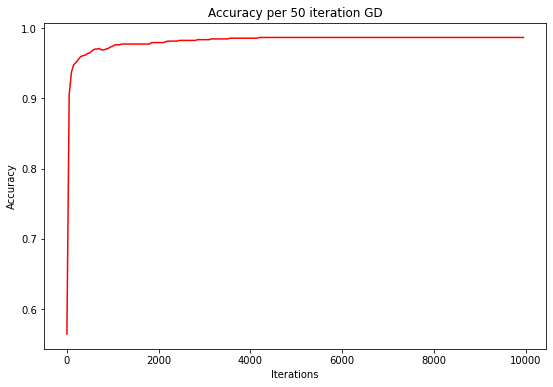

Final SGD weights:  [-0.08415512 -0.08528712 -0.01070767 -0.00609742]
Final SGD bias:  -0.0030616153271717118
SGD accuracy:  0.7614583333333333


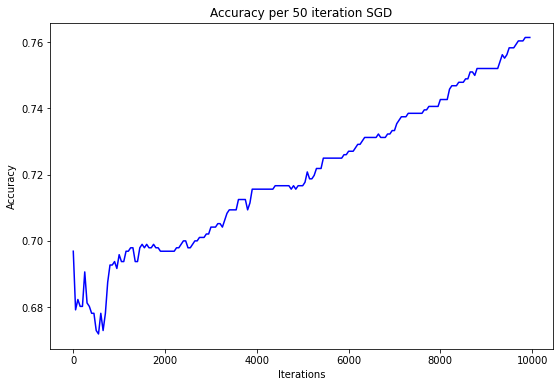

In [12]:
#for 3 different learning rates
LearningRate = [0.001 , 0.0001 , 0.00001]

for lrate in LearningRate :
    print('-----------------Learning Rate :',lrate,'---------------------')
    print(' ')
    
    #reading, shuffling and making 70:30 split
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()
    
    #calling function return values
    weights , bias , los, acc= LogisticRegression(lrate , no_iter , np_X , np_y)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate ,no_iter , np_X , np_y)

    iter = []
    for i in range(len(los)):
        iter.append(i*50)
 
    print("Final GD weights: ",weights)
    print("Final GD bias: ",bias)
    print("GD accuracy: ",(acc[-1]))
    plt.figure(figsize=(9, 6))
    plt.plot(iter,acc,label="Gradient Descent",color='red')
    plt.title("Accuracy per 50 iteration GD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()

    print("Final SGD weights: ",weightsSGD)
    print("Final SGD bias: ",biasSGD)
    print("SGD accuracy: ",(aSGD[-1]))
    plt.figure(figsize=(9, 6))
    plt.plot(iter,aSGD,label="Stochastic Gradient Descent",color='blue')
    plt.title("Accuracy per 50 iteration SGD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()